<img src="images/usm.png" width="480" height="240" align="left"/>

# MAT281 - 2° Semestre 2019
## Aplicaciones de la Matemática en la Ingeniería

## Objetivos de la clase

* Aprender técnicas para prevenir el overfitting en los modelos de machine learning. 


## Contenidos

* [Overfitting](#c1)


<a id='c1'></a>
## I.- Overfitting

### a) Introducción

* Comprender como un modelo se *ajusta* a los datos es muy importante para entender las causas de baja precisión en las predicciones. 

*  Un modelo va a estar sobreajustado cuando vemos que se desempeña bien con los datos de entrenamiento, pero su precisión es notablemente más baja con los datos de evaluación; esto se debe a que el modelo ha memorizado los datos que ha visto y no pudo *generalizar* las reglas para predecir los datos que no ha visto. 

* De aquí también la importancia de siempre contar con dos conjuntos de datos distintos, uno para entrenar el modelo y otro para evaluar su precisión; ya que si utilizamos el mismo dataset para las dos tareas, no tendríamos forma de determinar como el modelo se comporta con datos que nunca ha visto.

### ¿Cómo reconocer el sobreajuste?

* El sobreajuste va a estar relacionado con la complejidad del modelo, mientras más complejidad le agreguemos, mayor va a ser la tendencia a sobreajuste a los datos, ya que va a contar con mayor flexibilidad para realizar las predicciones y puede ser que los patrones que encuentre estén relacionados con el *ruido* (pequeños errores aleatorios) en los datos y no con la verdadera señal o relación subyacente. 

* No existe una regla general para establecer cual es el nivel ideal de complejidad que le podemos otorgar a nuestro modelo sin caer en el sobreajuste; pero podemos valernos de algunas herramientas analíticas para intentar entender como el modelo se ajusta a los datos y reconocer el sobreajuste. Veamos un ejemplo.

### b) Árboles de Decisión y sobreajuste

* Los [Árboles de Decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) pueden ser muchas veces una herramienta muy precisa, pero también con mucha tendencia al sobreajuste. Para construir estos modelos aplicamos un procedimiento recursivo para encontrar los atributos que nos proporcionan más información sobre distintos subconjuntos de datos, cada vez más pequeños. 

* Si aplicamos este procedimiento en forma reiterada, eventualmente podemos llegar a un árbol en el que cada *hoja* tenga una sola instancia de nuestra variable objetivo a clasificar. En este caso extremo, el [Árbol de Decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) va a tener una pobre *generalización* y estar bastante sobreajustado; ya que cada instancia de los datos de entrenamiento va a encontrar el camino que lo lleve eventualmente a la hoja que lo contiene, alcanzando así una precisión del 100% con los datos de entrenamiento. Veamos un ejemplo sencillo con la ayuda de python.

In [1]:
# librerias 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import random

random.seed(1982) # semilla

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
# Ejemplo en python - árboles de decisión
# dummy data con 100 atributos y 2 clases
X, y = make_classification(10000, 100, n_informative=3, n_classes=2,
                          random_state=1982)

# separ los datos en train y eval
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)

# creando el modelo sin control de profundidad, va a continuar hasta
# que todas las hojas sean puras
arbol = DecisionTreeClassifier(criterion='entropy')

# Ajustando el modelo
arbol.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [3]:
# precisión del modelo en datos de entrenamiento.
print("precisión entranamiento: {0: .2f}".format(
        arbol.score(x_train, y_train)))

precisión entranamiento:  1.00


Logramos una precisión del 100 %, increíble, este modelo no se equivoca! deberíamos utilizarlo para jugar a la lotería y ver si ganamos algunos millones; o tal vez, no?. Veamos como se comporta con los datos de evaluación.

In [4]:
# precisión del modelo en datos de evaluación.
print("precisión evaluación: {0: .2f}".format(
        arbol.score(x_eval, y_eval)))

precisión evaluación:  0.93


In [5]:
# profundidad del arbol de decisión.
arbol.tree_.max_depth

22

Ah, ahora nuestro modelo ya no se muestra tan preciso, esto se debe a que seguramente esta sobreajustado, ya que dejamos crecer el árbol hasta que cada hoja estuviera pura (es decir que solo contenga datos de una sola de las clases a predecir). Una alternativa para reducir el sobreajuste y ver si podemos lograr que *generalice* mejor y por tanto tenga más precisión para datos nunca vistos, es tratar de reducir la complejidad del modelo por medio de controlar la profundidad que puede alcanzar el Árbol de Decisión

In [6]:
# modelo dos, con control de profundiad de 5 nodos
arbol2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Ajustando el modelo
arbol2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
# precisión del modelo en datos de entrenamiento.
print("precisión entranamiento: {0: .2f}".format(
        arbol2.score(x_train, y_train)))

precisión entranamiento:  0.94


Ahora podemos ver que ya no tenemos un modelo con 100% de precisión en los datos de entrenamiento, sino que la precisión es bastante inferior, 92%, sin embargo si ahora medimos la precisión con los datos de evaluación vemos que la precisión es del 90%, 3 puntos por arriba de lo que habíamos conseguido con el primer modelo que nunca se equivocaba en los datos de entrenamiento. 

In [8]:
# precisión del modelo en datos de evaluación.
print("precisión evaluación: {0: .2f}".format(
        arbol2.score(x_eval, y_eval)))

precisión evaluación:  0.93


Esta diferencia se debe a que reducimos la complejidad del modelo para intentar ganar en generalización. También debemos tener en cuenta que si seguimos reduciendo la complejidad, podemos crear un modelo demasiado simple que en vez de estar sobreajustado puede tener un desempeño muy por debajo del que podría tener; podríamos decir que el modelo estaría *infraajustado* y tendría un alto nivel de *sesgo*. 

Para ayudarnos a encontrar el término medio entre la complejidad del modelo y su *ajuste* a los datos, podemos ayudarnos de herramientas gráficas. Por ejemplo podríamos crear diferentes modelos, con distintos grados de complejidad y luego graficar la precisión en función de la complejidad.

In [9]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 23))

# Entrenar con arboles de distinta profundidad
for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol3.fit(x_train, y_train)
    train_prec.append(arbol3.score(x_train, y_train))
    eval_prec.append(arbol3.score(x_eval, y_eval))

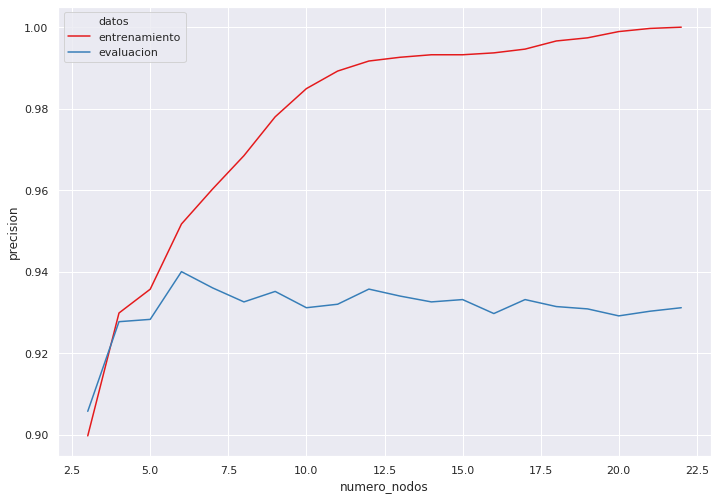

In [10]:
# graficar los resultados.

sns.set(rc={'figure.figsize':(11.7,8.27)})

df1 = pd.DataFrame({'numero_nodos':max_deep_list,
                   'precision':train_prec,
                   'datos':'entrenamiento'})

df2 = pd.DataFrame({'numero_nodos':max_deep_list,
                   'precision':eval_prec,
                   'datos':'evaluacion'})

df_graph = pd.concat([df1,df2])

sns.lineplot(data=df_graph,
             x='numero_nodos',
             y='precision',
             hue='datos',
             palette="Set1")

El gráfico que acabamos de construir se llama **gráfico de ajuste** y muestra la precisión del modelo en función de su complejidad. En nuestro ejemplo, podemos ver que el punto con mayor precisión, en los datos de evaluación, lo obtenemos con un nivel de profundidad de aproximadamente 6 nodos; a partir de allí el modelo pierde en *generalización* y comienza a estar sobreajustado. También podemos crear un gráfico similar con la ayuda deScikit-learn, utilizando `validation_curve`.

In [11]:
# utilizando validation curve de sklearn
from sklearn.model_selection import validation_curve

train_prec, eval_prec = validation_curve(estimator=arbol, X=x_train,
                                        y=y_train, param_name='max_depth',
                                        param_range=max_deep_list, cv=5)

train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

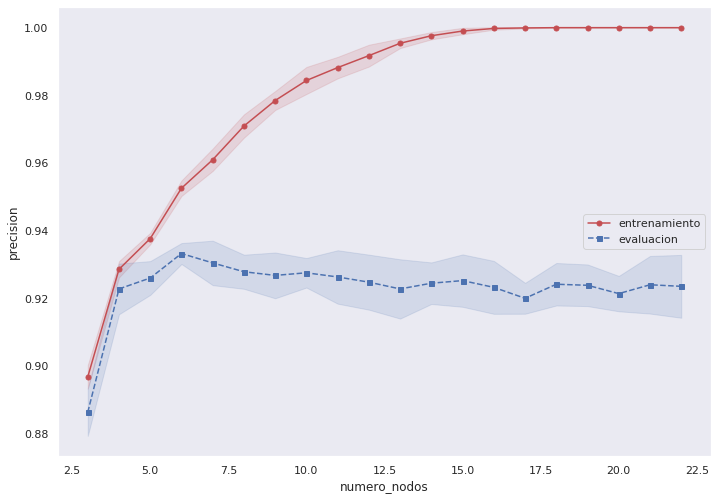

In [12]:
# graficando las curvas
plt.plot(max_deep_list, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(max_deep_list, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(max_deep_list, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(max_deep_list, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('numero_nodos')
plt.ylabel('precision')
plt.show()

En este gráfico, también podemos ver que nuestro modelo tiene bastante varianza, representada por el área esfumada.

## c) Métodos para reducir el Sobreajuste

Algunas de las técnicas que podemos utilizar para reducir el [Sobreajuste](https://es.wikipedia.org/wiki/Sobreajuste), son:

* Recolectar más datos.
* Introducir una penalización a la complejidad con alguna técnica de regularización.
* Utilizar modelos ensamblados.
* Utilizar validación cruzada.
* Optimizar los parámetros del modelo con *grid search*.
* Reducir la dimensión de los datos.
* Aplicar técnicas de selección de atributos.


Veremos ejemplos de algunos métodos para reducir el sobreajuste.

### c.1) Validación cruzada

La validación cruzada se inicia mediante el fraccionamiento de un conjunto de datos en un número $k$ de particiones (generalmente entre 5 y 10) llamadas *pliegues*.

La validación cruzada luego itera entre los datos de *evaluación* y *entrenamiento* $k$ veces, de un modo particular. En cada iteración de la validación cruzada, un *pliegue* diferente se elige como los datos de *evaluación*. En esta iteración, los otros *pliegues* $k-1$ se combinan para formar los datos de *entrenamiento*. Por lo tanto, en cada iteración tenemos $(k-1) / k$ de los datos utilizados para el *entrenamiento* y $1 / k$ utilizado para la *evaluación*.

Cada iteración produce un modelo, y por lo tanto una estimación del rendimiento de la *generalización*, por ejemplo, una estimación de la precisión. Una vez finalizada la validación cruzada, todos los ejemplos se han utilizado sólo una vez para *evaluar* pero $k -1$ veces para *entrenar*. En este punto tenemos estimaciones de rendimiento de todos los *pliegues* y podemos calcular la media y la desviación estándar de la precisión del modelo. 

<img alt="Validacion cruzada" title="Validacion cruzada" src="http://relopezbriega.github.io/images/validacion_cruzada.png">

Veamos un ejemplo en python:

In [13]:
# Ejemplo cross-validation
from sklearn.model_selection import cross_validate,StratifiedKFold

# creando pliegues

skf = StratifiedKFold(n_splits=20,
                      random_state=2016)
precision = []

skf.get_n_splits(x_train, y_train)
for k, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    arbol2.fit(X_train,y_train) 
    score = arbol2.score(X_test,y_test)
    precision.append(score)
    print('Pliegue: {0:}, Dist Clase: {1:}, Prec: {2:.3f}'.format(k+1,
                        np.bincount(y_train), score))
    

Pliegue: 1, Dist Clase: [4762 4737], Prec: 0.926
Pliegue: 2, Dist Clase: [4762 4737], Prec: 0.914
Pliegue: 3, Dist Clase: [4762 4737], Prec: 0.916
Pliegue: 4, Dist Clase: [4762 4737], Prec: 0.940
Pliegue: 5, Dist Clase: [4762 4737], Prec: 0.924
Pliegue: 6, Dist Clase: [4762 4737], Prec: 0.936
Pliegue: 7, Dist Clase: [4762 4737], Prec: 0.926
Pliegue: 8, Dist Clase: [4762 4738], Prec: 0.938
Pliegue: 9, Dist Clase: [4762 4738], Prec: 0.936
Pliegue: 10, Dist Clase: [4762 4738], Prec: 0.906
Pliegue: 11, Dist Clase: [4762 4738], Prec: 0.938
Pliegue: 12, Dist Clase: [4762 4738], Prec: 0.940
Pliegue: 13, Dist Clase: [4762 4738], Prec: 0.936
Pliegue: 14, Dist Clase: [4763 4738], Prec: 0.922
Pliegue: 15, Dist Clase: [4763 4738], Prec: 0.930
Pliegue: 16, Dist Clase: [4763 4738], Prec: 0.926
Pliegue: 17, Dist Clase: [4763 4738], Prec: 0.922
Pliegue: 18, Dist Clase: [4763 4738], Prec: 0.928
Pliegue: 19, Dist Clase: [4763 4738], Prec: 0.936
Pliegue: 20, Dist Clase: [4763 4738], Prec: 0.918


En este ejemplo, utilizamos el iterador `StratifiedKFold` que nos proporciona Scikit-learn. Este iterador es una versión mejorada de la validación cruzada, ya que cada *pliegue* va a estar estratificado para mantener las proporciones entre las *clases* del conjunto de datos original, lo que suele dar mejores estimaciones del sesgo y la varianza del modelo. También podríamos utilizar `cross_val_score` que ya nos proporciona los resultados de la precisión que tuvo el modelo en cada *pliegue*.

In [14]:
# Ejemplo con cross_val_score
from sklearn.model_selection import cross_val_score

# separ los datos en train y eval
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)


arbol2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
precision = cross_val_score(estimator=arbol2,
                            X=x_train,
                            y=y_train,
                            cv=20)

In [15]:
precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.93, 0.94, 0.92, 0.94, 0.93, 0.9, 0.92, 0.94, 0.94, 0.93, 0.94, 0.92, 0.9, 0.9, 0.94, 0.94, 0.93, 0.93, 0.93, 0.93] 
Precision promedio:  0.927 +/-  0.013


### Más datos y curvas de aprendizaje

* Muchas veces, reducir el Sobreajuste es tan fácil como conseguir más datos, dame más datos y te predeciré el futuro!. 
* En la vida real nunca es una tarea tan sencilla conseguir más datos. 
* Una técnica para reducir el sobreajuste son las *curvas de aprendizaje*, las cuales grafican la precisión en función del tamaño de los datos de entrenamiento. 

<img alt="Curva de aprendizaje" title="Curva de aprendizaje" src="http://relopezbriega.github.io/images/curva_aprendizaje.png" width="600px" height="600px" >

Para graficar las curvas de aprendizaje es necesario ocupar el comando de sklearn llamado `learning_curve`.

In [16]:
# Ejemplo Curvas de aprendizaje
from sklearn.model_selection import  learning_curve

train_sizes, train_scores, test_scores = learning_curve(
                        estimator=arbol2,
                        X=x_train,
                        y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 20),
                        cv=10,
                        n_jobs=-1
                        )

# calculo de metricas
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Veamos que el comando `learning_curve` va creando conjunto de datos, pero de distintos tamaños.

In [17]:
# tamano conjunto de entrenamiento
for k in range(len(train_sizes)):
    print('Tamaño Conjunto {}: {}'.format(k+1,train_sizes[k]))

Tamaño Conjunto 1: 584
Tamaño Conjunto 2: 861
Tamaño Conjunto 3: 1139
Tamaño Conjunto 4: 1416
Tamaño Conjunto 5: 1693
Tamaño Conjunto 6: 1970
Tamaño Conjunto 7: 2247
Tamaño Conjunto 8: 2524
Tamaño Conjunto 9: 2801
Tamaño Conjunto 10: 3078
Tamaño Conjunto 11: 3355
Tamaño Conjunto 12: 3632
Tamaño Conjunto 13: 3909
Tamaño Conjunto 14: 4186
Tamaño Conjunto 15: 4463
Tamaño Conjunto 16: 4740
Tamaño Conjunto 17: 5017
Tamaño Conjunto 18: 5294
Tamaño Conjunto 19: 5571
Tamaño Conjunto 20: 5849


Finalmente, graficamos las precisiones tanto para el conjunto de entranamiento como de evaluación para los distintos conjuntos de datos generados. 

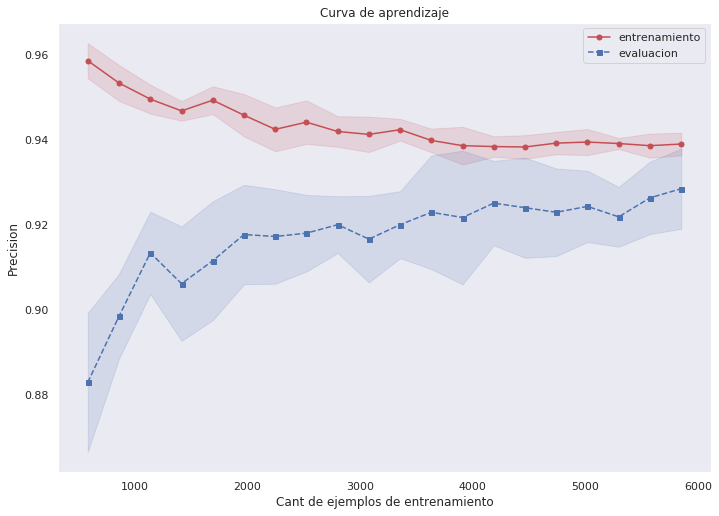

In [18]:
# graficando las curvas
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje')
plt.legend(loc='upper right')
plt.xlabel('Cant de ejemplos de entrenamiento')
plt.ylabel('Precision')
plt.show()

En este gráfico podemos concluir que:

* Con pocos datos la precisión entre los datos de entrenamiento y los de evaluación son muy distintas y luego a medida que la cantidad de datos va aumentando, el modelo puede generalizar mucho mejor y las precisiones se comienzan a emparejar. 
* Este gráfico también puede ser importante a la hora de decidir invertir en la obtención de más datos, ya que por ejemplo nos indica que a partir las 2500 muestras, el modelo ya no gana mucha más precisión a pesar de obtener más datos.

### c.2) Optimización de parámetros con Grid Search

La mayoría de los modelos de Machine Learning cuentan con varios parámetros para ajustar su comportamiento, por lo tanto otra alternativa que tenemos para reducir el Sobreajuste es optimizar estos parámetros por medio de un proceso conocido como **grid search** e intentar encontrar la combinación ideal que nos proporcione mayor precisión.

El enfoque que utiliza *grid search* es bastante simple, se trata de una búsqueda exhaustiva por el paradigma de fuerza bruta en el que se especifica una lista de valores para diferentes parámetros, y la computadora evalúa el rendimiento del modelo para cada combinación de éstos parámetros para obtener el conjunto óptimo que nos brinda el mayor rendimiento. 


<img alt="Curva de aprendizaje" title="Curva de aprendizaje" src="https://miro.medium.com/max/3200/1*yHNmVkf43eTJF5QDebUltQ.png" width="700" height="600px" >

Veamos un ejemplo utilizando un modelo de [SVM o Máquinas de vectores de soporte](https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte), la idea va a ser optimizar los parámetros `gamma` y `C` de este modelo. 

* El parámetro `gamma` define cuan lejos llega la influencia de un solo ejemplo de entrenamiento, con valores bajos que significan "lejos" y los valores altos significan "cerca".
* El parámetro `C` es el que establece la penalización por error en la clasificación un valor bajo de este parámetro hace que la superficie de decisión sea más lisa, mientras que un valor alto tiene como objetivo que todos los ejemplos se clasifiquen correctamente, dándole más libertad al modelo para elegir más ejemplos como vectores de soporte.

Tengan en cuenta que como todo proceso por fuerza bruta, puede tomar bastante tiempo según la cantidad de parámetros que utilicemos para la optimización.

In [19]:
# Ejemplo de grid search con SVM.
from sklearn.model_selection import GridSearchCV

# creación del modelo
svm = SVC(random_state=1982)

# rango de parametros
rango_C = np.logspace(-2, 10, 5)
rango_gamma = np.logspace(-9, 3, 5)
param_grid = dict(gamma=rango_gamma, C=rango_C)

# crear grid search
gs = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5,n_jobs=-1)

# comenzar el ajuste
gs = gs.fit(x_train, y_train)

In [20]:
# imprimir resultados
print(gs.best_score_)
print(gs.best_params_)

0.8847692307692308
{'C': 10000.0, 'gamma': 1e-06}


In [21]:
# utilizando el mejor modelo
mejor_modelo = gs.best_estimator_
mejor_modelo.fit(x_train, y_train)
print('Precisión: {0:.3f}'.format(mejor_modelo.score(x_eval, y_eval)))

Precisión: 0.883


En este ejemplo, primero utilizamos el objeto `GridSearchCV` que nos permite realizar *grid search* junto con validación cruzada, luego comenzamos a ajustar el modelo con las diferentes combinaciones de los valores de los parámetros `gamma` y `C`. Finalmente imprimimos el mejor resultado de precisión y los valores de los parámetros que utilizamos para obtenerlos; por último utilizamos este mejor modelo para realizar las predicciones con los datos de *evaluación*. 

Podemos ver que la precisión que obtuvimos con los datos de evaluación es casi idéntica a la que nos indicó *grid search*, lo que indica que el modelo *generaliza* muy bien.


### c.3) Reducción de dimensionalidad

La reducción de dimensiones es frecuentemente usada como una etapa de preproceso en el entrenamiento de
sistemas, y consiste en escoger un subconjunto de
variables, de tal manera, que el espacio de características
quede óptimamente reducido de acuerdo a un criterio de
evaluación, cuyo fin es distinguir el subconjunto que
representa mejor el espacio inicial de entrenamiento.

Como cada característica que se incluye en el análisis,
puede incrementar el costo y el tiempo de proceso de los
sistemas, hay una fuerte motivación para diseñar e
implementar sistemas con pequeños conjuntos de
características. Sin dejar de lado, que al mismo tiempo,
hay una opuesta necesidad de incluir un conjunto
suficiente de características para lograr un alto
rendimiento. 


La reducción de dimensionalidad se puede separar en dos tipos: **Selección de aributos** y **Extracción de atributos**


### i) Selección de atributos

* Proceso por el cual seleccionamos un subconjunto de atributos (representados por cada una de las columnas en un datasetde forma tabular) que son más relevantes para la construcción del modelo predictivo sobre el que estamos trabajando. 

* El proceso de selección de atributos es tanto un arte como una ciencia, en donde el conocimiento sobre el problema y la intuición son sumamente importantes. 

* El objetivo de la selección de atributos es : 
    * mejorar la capacidad predictiva de nuestro modelo, 
    * proporcionando modelos predictivos más rápidos y eficientes, 
    * proporcionar una mejor comprensión del proceso subyacente que generó los datos. 
    
    
* Los métodos de selección de atributos se pueden utilizar para identificar y eliminar los atributos innecesarios, irrelevantes y redundantes que no contribuyen a la exactitud del modelo predictivo o incluso puedan disminuir su precisión. 




### Algoritmos para selección de atributos

Podemos encontrar dos clases generales de algoritmos de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection): los métodos de filtrado, y los métodos empaquetados.

* **Métodos de filtrado**:  Estos métodos aplican una medida estadística para asignar una puntuación a cada atributo. Los atributos luego son clasificados de acuerdo a su puntuación y son, o bien seleccionados para su conservación o eliminados del conjunto de datos. Los métodos de filtrado son a menudo [univariantes](https://en.wikipedia.org/wiki/Univariate_analysis) y consideran a cada atributo en forma independiente, o con respecto a la variable dependiente.
    * Ejemplos : [prueba de Chi cuadrado](https://es.wikipedia.org/wiki/Prueba_%CF%87%C2%B2), [prueba F de Fisher](https://es.wikipedia.org/wiki/Prueba_F_de_Fisher), [ratio de ganancia de información](https://en.wikipedia.org/wiki/Information_gain_ratio) y los [coeficientes de correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n).
    

* **Métodos empaquetados**: Estos métodos consideran la selección de un conjunto de atributos como un problema de búsqueda, en donde las diferentes combinaciones son evaluadas y comparadas. Para hacer estas evaluaciones se utiliza un modelo predictivo y luego se asigna una puntuación a cada combinación basada en la precisión del modelo.
    * Un ejemplo de este método es el algoritmo de eliminación recursiva de atributos.

Un método popular en sklearn es el método **SelectKBest**, el cual selecciona las  características de acuerdo con las $k$ puntuaciones más altas (de acuerdo al criterio escogido). 

Para entender este conceptos, analicemos un caso en python. El conjunto de datos a ocupar se denomina `LEARNING.csv` que tiene 
47700 filas y 482 columnas!!!.

In [22]:
# <!-- collapse=True -->
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [23]:
# importando el dataset preprocesado.
ONG_data = pd.read_csv(os.path.join("data","LEARNING.csv"), 
                       sep=",",
                       header=0)

# Agrupando columnas por tipo de datos
tipos = ONG_data.columns.to_series().groupby(ONG_data.dtypes).groups

# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]

# Convertir datos categoricos a numericos
tipos = ONG_data.columns.to_series().groupby(ONG_data.dtypes).groups
ctext = tipos[np.dtype('object')]

for c in ctext:
    ONG_data[c], _ = pd.factorize(ONG_data[c])
    
# Armando lista de columnas numéricas
columnas = ONG_data.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))

# Completando valores faltantas datos cuantititavos
for c in cnum:
    mean = ONG_data[c].mean()
    ONG_data.loc[:,c] = ONG_data.loc[:,c].fillna(mean)

# Agregando la columna AGE2
AGE2 = pd.cut(ONG_data['AGE'], range(0, 100, 10))
ONG_data['AGE2'] = AGE2

# Eliminar columnas con donaciones superiores a 60 (atípicos)
ONG_data = ONG_data[ONG_data.DONOR_AMOUNT < 60]

ONG_data['AGE2'], _ = pd.factorize(ONG_data['AGE2'])

/home/falfaro/.local/share/virtualenvs/messi-l92U7xSO/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Con estas manipulaciones lo que hicimos es cargar en memoria el dataset, luego procesamos los datos, le agregamos la nueva columna AGE2, ya que es mejor tener la edad agrupada en rangos en lugar de individualmente, luego eliminamos los valores atípicos que habíamos detectado; y por último, reemplazamos con su equivalente numérico a todas las variables categóricas; ya que para los algoritmos de Scikit-learn es mucho más eficiente trabajar con variables numéricas.

Ahora sí, ya estamos en condiciones de poder comenzar a aplicar algunos de los algoritmos de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection), comencemos con un simple algoritmo [univariante](https://en.wikipedia.org/wiki/Univariate_analysis) que aplica el método de filtrado. Para esto vamos a utilizar los objetos `SelectKBest` y `f_classif` del paquete `sklearn.feature_selection`.

Este algoritmo selecciona a los mejores atributos basándose en una prueba estadística [univariante](https://en.wikipedia.org/wiki/Univariate_analysis). Al objeto `SelectKBest` le pasamos la prueba estadística que vamos a a aplicar, en este caso una [prueba F](https://es.wikipedia.org/wiki/Prueba_F_de_Fisher) definida por el objeto `f_classif`, junto con el número de atributos a seleccionar. El algoritmo va a aplicar la prueba a todos los atributos y va a seleccionar los que mejor resultado obtuvieron.


In [24]:
# Separamos las columnas objetivo
donor_flag = ONG_data['DONOR_FLAG']
donor_amount = ONG_data['DONOR_AMOUNT']
indice = ONG_data['IDX']

In [25]:
# Aplicando el algoritmo univariante de prueba F.
k = 15  # número de atributos a seleccionar
entrenar = ONG_data.drop(['DONOR_FLAG', 'DONOR_AMOUNT', 'IDX'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, donor_flag)

/home/falfaro/.local/share/virtualenvs/messi-l92U7xSO/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [364 374 470] are constant.
  UserWarning)
/home/falfaro/.local/share/virtualenvs/messi-l92U7xSO/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [26]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

['ODATEDW',
 'PEPSTRFL',
 'HVP3',
 'CARDPROM',
 'NUMPROM',
 'RAMNT_8',
 'RAMNT_16',
 'NGIFTALL',
 'CARDGIFT',
 'LASTGIFT',
 'LASTDATE',
 'FISTDATE',
 'AVGGIFT',
 'RFA_2F',
 'RFA_2A']

Como podemos ver, el algoritmo nos seleccionó la cantidad de atributos que le indicamos; en este ejemplo decidimos seleccionar solo 15; obviamente, cuando armemos nuestro modelo final vamos a tomar un número mayor de atributos.

### ii) Extracción de atributos

* La extracción de atributos comienza a partir de un conjunto inicial de datos medidos y crea valores derivados (características) destinados a ser informativos y no redundantes, lo que facilita los pasos de aprendizaje y generalización posteriores, y en algunos casos conduce a a mejores interpretaciones humanas. 

* Cuando los datos de entrada a un algoritmo son demasiado grandes para ser procesados y se sospecha que son redundantes (por ejemplo, la misma medición en pies y metros, o la repetitividad de las imágenes presentadas como píxeles), entonces se puede transformar en un conjunto reducido de características (también denominado un vector de características). 

### Análisis de componentes principales


El análisis de componentes principales (PCA) es un procedimiento estadístico que utiliza una transformación ortogonal para convertir un conjunto de observaciones de variables posiblemente correlacionadas (entidades que adquieren varios valores numéricos) en un conjunto de valores de variables linealmente no correlacionadas llamadas componentes principales. 

Esta transformación se define de tal manera que el primer componente principal tiene la mayor varianza posible (es decir, representa la mayor variabilidad posible en los datos), y cada componente subsiguiente a su vez tiene la mayor varianza posible bajo la restricción que es ortogonal a los componentes anteriores.

Los vectores resultantes (cada uno de los cuales es una combinación lineal de las variables y contiene n observaciones) son un conjunto de bases ortogonales no correlacionadas. PCA es sensible a la escala relativa de las variables originales.

<img alt="Series de tiempo con Python" title="Series de tiempo con Python" src="https://devopedia.org/images/article/139/4543.1548137789.jpg" high=400px width=600px>

Para entenderlo mejor, veamoslo con un ejemplo en python.

In [27]:
# cargar datos
from sklearn import datasets
iris = datasets.load_iris()


df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['TARGET'] = iris.target
df.columns = ['sepal length', 'sepal width' , 'petal lenght', 'petal width', 'target']
df.head() # estructura de nuestro dataset.

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Como el algoritmo de PCA es sensible a la escala relativa de las variables originales, es necesario **escalar** los datos, es decir,  centrar y escalar los datos. De esta manera, el valor promedio de cada registro sería 0 y la varianza para cada registro sería 1.

Para escalar nuestros datos, usaríamos `StandardScalar`, que está disponible en sklearn.

In [28]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width' , 'petal lenght', 'petal width']

x = df.loc[:, features].values
y = df.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

Luego aplicamos el algoritmo de `PCA` sobre todos los componenetes, para ver cuanta varianza explica cada variable. 

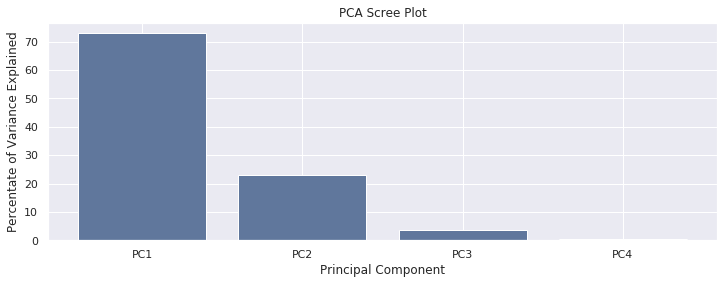

In [29]:
# ajustar modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Ahora realizamos el gráfico pero respecto a la suma acumulada. 

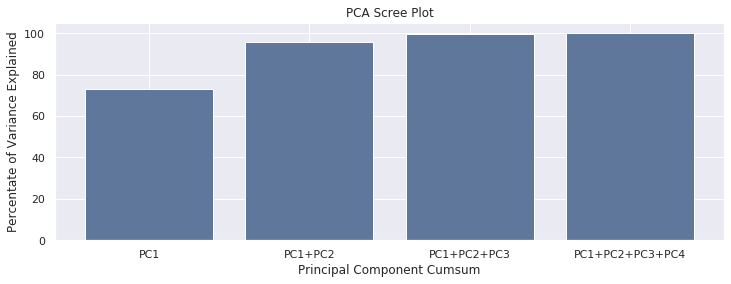

In [30]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Es decir, que la varianza explicada de las variables se puede explicar en 95.81% considerando solo las dos componentes principales (PC1 y PC2).

Realicemos el ajuste para las dos componentes principales y realicemos la nueva gráfica proyectada a estas componentes

In [31]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


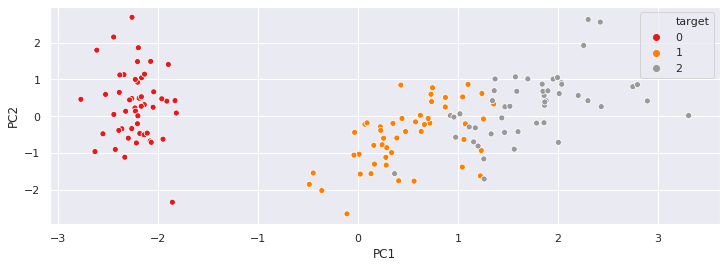

In [32]:
sns.set(rc={'figure.figsize':(12,4)})

sns.scatterplot(x='PC1',
                y='PC2',
                hue='target',
                palette="Set1",
                data=newDataframe)


Finalmente, para poder trabajar los modelos pero en con sus componenetes proyectadas, se debe aplicar la función `fit_transform` sobre el cojunto de atributos.

In [33]:
# componenetes proyectadas

Y= df[['target']]
X_new = pca.fit_transform(df[['sepal length', 'sepal width', 'petal lenght', 'petal width']])

In [34]:
# crear conjunto de entrenamiento y testeo pero en con las componentes proyectadas
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2, random_state = 2) 

## Referencia

1. [K-Fold Cross Validation](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833)
2. [Cross Validation and Grid Search for Model Selection in Python](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/)
3. [Feature selection for supervised models using SelectKBest](https://www.kaggle.com/jepsds/feature-selection-using-selectkbest?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)
4. [In Depth: Principal Component Analysis](https://www.aprendemachinelearning.com/comprende-principal-component-analysis/)